In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=';')

df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
label_encoder = LabelEncoder()

for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])


In [6]:
X = df.drop('y', axis=1) 
y = df['y']               


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [9]:
y_pred = dt_model.predict(X_test)


In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9149065307113377


In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[7035  268]
 [ 433  502]]


In [12]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.54      0.59       935

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [13]:
feature_importance = pd.Series(
    dt_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


duration          0.494374
nr.employed       0.359908
pdays             0.040013
euribor3m         0.034857
cons.conf.idx     0.033738
month             0.013966
day_of_week       0.011307
cons.price.idx    0.006807
contact           0.002119
emp.var.rate      0.001567
dtype: float64

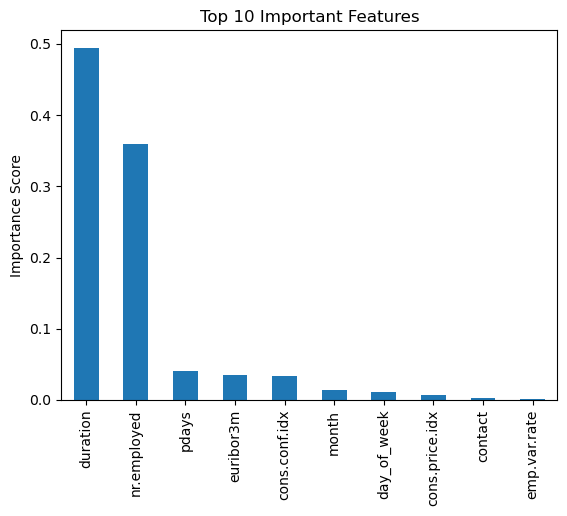

In [14]:
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.ylabel("Importance Score")
plt.show()
